In [13]:
import tensorflow
import numpy as np

In [12]:
from scipy import ndimage
import pydicom
from matplotlib import pyplot as plt

In [8]:
import os
%load_ext autoreload
%autoreload 2

In [9]:
os.path.join("/home","simon/Music")

'/home/simon/Music'

In [82]:
def downsample(image, size=(16,16)):
    zoom = [target / source for target, source in zip(size, image.shape) ]
    image = ndimage.zoom(image,zoom=zoom)
    return image

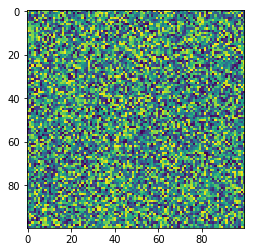

In [83]:
image = np.random.uniform(size=(100,100))
plt.imshow(image)

In [84]:
test_dims = np.random.randint(1,100,size=(50,2))
test_images = np.random.randint(1,100,size=(50,100,100))

In [85]:
for i1 in range(test_dims.shape[0]):
    shape = test_dims[i1]
    shape_real = downsample(test_images[i1],size=(shape)).shape
    assert (shape==shape_real).all()

[0.08, 0.86]
(8, 86) [ 8 86]
[0.92, 0.6]
(92, 60) [92 60]
[0.85, 0.3]
(85, 30) [85 30]
[0.99, 0.67]
(99, 67) [99 67]
[0.15, 0.59]
(15, 59) [15 59]
[0.62, 0.45]
(62, 45) [62 45]
[0.75, 0.23]
(75, 23) [75 23]
[0.83, 0.06]
(83, 6) [83  6]
[0.19, 0.54]
(19, 54) [19 54]
[0.23, 0.48]
(23, 48) [23 48]
[0.69, 0.67]
(69, 67) [69 67]
[0.34, 0.63]
(34, 63) [34 63]
[0.34, 0.1]
(34, 10) [34 10]
[0.25, 0.62]
(25, 62) [25 62]
[0.51, 0.23]
(51, 23) [51 23]
[0.21, 0.67]
(21, 67) [21 67]
[0.61, 0.41]
(61, 41) [61 41]
[0.05, 0.38]
(5, 38) [ 5 38]
[0.68, 0.19]
(68, 19) [68 19]
[0.22, 0.49]
(22, 49) [22 49]
[0.11, 0.45]
(11, 45) [11 45]
[0.15, 0.27]
(15, 27) [15 27]
[0.04, 0.94]
(4, 94) [ 4 94]
[0.4, 0.91]
(40, 91) [40 91]
[0.56, 0.53]
(56, 53) [56 53]
[0.5, 0.32]
(50, 32) [50 32]
[0.36, 0.88]
(36, 88) [36 88]
[0.28, 0.94]
(28, 94) [28 94]
[0.3, 0.45]
(30, 45) [30 45]
[0.55, 0.97]
(55, 97) [55 97]
[0.86, 0.05]
(86, 5) [86  5]
[0.48, 0.2]
(48, 20) [48 20]
[0.67, 0.91]
(67, 91) [67 91]
[0.03, 0.86]
(3, 86) [

/home/simon/miniconda3/envs/aneurysm-segment/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [76]:
ndimage.zoom(np.zeros((10,10,10)),zoom=2).shape

(20, 20, 20)

In [61]:
del masks